<a href="https://colab.research.google.com/github/TapanManu/Pytorch-Repo/blob/master/MNIST_Digits_Identifier.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
from torchvision import datasets,transforms
import torch
from torch import nn
import torch.nn.functional as F

#define a transform to normalize the data
transform = transforms.Compose([transforms.ToTensor(),
                                transforms.Normalize([0.5],[0.5]),
                                ])

#downloading MNIST Dataset
trainset = datasets.MNIST('MNIST_data/',download=True,train=True,transform=transform)
trainloader=torch.utils.data.DataLoader(trainset,batch_size=64,shuffle=True)

In [0]:
model = nn.Sequential(nn.Linear(784,128),
                      nn.ReLU(),
                      nn.Linear(128,64),
                      nn.ReLU(),
                      nn.Linear(64,10))

#defining loss function
criterion = nn.CrossEntropyLoss()

In [3]:
#neural network with 784 input units
#128 hidden units in first layer
#64 hidden units in second layer
#10 output units
#the input shape of each image is 28x28 
#hence we need to flatten it into a vector/tensor
dataiter = iter(trainloader)
images,labels = dataiter.next()
#print(images.shape)
#print(labels.shape)
features = images.view(images.shape[0],-1)

#set logits
logits = model(features)

#set loss
loss = criterion(logits,labels)

print(loss)



tensor(2.2997, grad_fn=<NllLossBackward>)


In [14]:
soft_model = nn.Sequential(nn.Linear(784,128),
                           nn.ReLU(),
                           nn.Linear(128,64),
                           nn.ReLU(),
                           nn.Linear(64,10),
                           nn.LogSoftmax(dim=1))

loss_criterion = nn.NLLLoss()
dataiter = iter(trainloader)
images,labels = dataiter.next()
#print(images.shape)
#print(labels.shape)
features = images.view(images.shape[0],-1)

#set logits
pred = model(features)

#set loss
loss = loss_criterion(pred,labels)

print(loss)

tensor(-0.0153, grad_fn=<NllLossBackward>)


In [15]:
print('before backward pass',loss.grad)
loss.backward()
print('after backward pass',loss.grad)

before backward pass None
after backward pass None


In [0]:
from torch import optim
optimizer = optim.SGD(soft_model.parameters(),lr=0.01)

In [18]:
print('initial weights',soft_model[0].weight)
images,labels = next(iter(trainloader))
images.resize_(64,784)

optimizer.zero_grad()

output = soft_model.forward(images)
loss = loss_criterion(output,labels)
print(loss)

print('Gradient',soft_model[0].weight.grad)

initial weights Parameter containing:
tensor([[ 0.0316,  0.0186, -0.0225,  ..., -0.0253, -0.0034, -0.0338],
        [ 0.0243,  0.0326, -0.0355,  ..., -0.0138, -0.0292, -0.0096],
        [ 0.0237, -0.0324,  0.0212,  ...,  0.0178, -0.0174, -0.0276],
        ...,
        [ 0.0272, -0.0149,  0.0218,  ..., -0.0276, -0.0294,  0.0142],
        [-0.0189, -0.0172, -0.0098,  ...,  0.0196, -0.0119, -0.0032],
        [-0.0355, -0.0042,  0.0034,  ...,  0.0024, -0.0333, -0.0008]],
       requires_grad=True)
tensor(2.3084, grad_fn=<NllLossBackward>)
Gradient None


In [19]:
loss.backward()
print('Gradient',soft_model[0].weight.grad)

Gradient tensor([[ 0.0000e+00,  0.0000e+00,  0.0000e+00,  ...,  0.0000e+00,
          0.0000e+00,  0.0000e+00],
        [-4.2371e-03, -4.2371e-03, -4.2371e-03,  ..., -4.2371e-03,
         -4.2371e-03, -4.2371e-03],
        [-4.4004e-03, -4.4004e-03, -4.4004e-03,  ..., -4.4004e-03,
         -4.4004e-03, -4.4004e-03],
        ...,
        [-5.3569e-04, -5.3569e-04, -5.3569e-04,  ..., -5.3569e-04,
         -5.3569e-04, -5.3569e-04],
        [-9.6756e-05, -9.6756e-05, -9.6756e-05,  ..., -9.6756e-05,
         -9.6756e-05, -9.6756e-05],
        [ 2.4162e-04,  2.4162e-04,  2.4162e-04,  ...,  2.4162e-04,
          2.4162e-04,  2.4162e-04]])


In [20]:
optimizer.step()
print('updated weights',soft_model[0].weight)

updated weights Parameter containing:
tensor([[ 0.0316,  0.0186, -0.0225,  ..., -0.0253, -0.0034, -0.0338],
        [ 0.0243,  0.0326, -0.0355,  ..., -0.0138, -0.0292, -0.0096],
        [ 0.0237, -0.0323,  0.0213,  ...,  0.0179, -0.0174, -0.0276],
        ...,
        [ 0.0272, -0.0149,  0.0218,  ..., -0.0276, -0.0294,  0.0142],
        [-0.0189, -0.0172, -0.0098,  ...,  0.0196, -0.0119, -0.0032],
        [-0.0355, -0.0042,  0.0034,  ...,  0.0024, -0.0333, -0.0008]],
       requires_grad=True)


In [27]:
model = nn.Sequential(nn.Linear(784,128),
                      nn.ReLU(),
                      nn.Linear(128,64),
                      nn.ReLU(),
                      nn.Linear(64,10),
                      nn.LogSoftmax(dim=1))
criterion=nn.NLLLoss()
optimizer = optim.SGD(model.parameters(),lr=0.004)

epochs=5
for e in range(epochs):
  running_loss=0
  #optimizer.zero_grad() => it's not correct,pls don't do this mistake
  for images,labels in trainloader:
    images = images.view(images.shape[0],-1)
    output = model(images)
    #or use model.forward(images)
    optimizer.zero_grad()
    loss =  criterion(output,labels)
    loss.backward()
    optimizer.step()
    running_loss+=loss.item()
  else:
    print('loss:',running_loss/len(trainloader))

loss: 1.7773299358292682
loss: 0.6788167187145778
loss: 0.45815638036552525
loss: 0.3904509779963412
loss: 0.35545766543446067


In [32]:
import matplotlib.pyplot as plt
import numpy as np
def view_classify(img, ps, version="MNIST"):
    ''' Function for viewing an image and it's predicted classes.
    '''
    ps = ps.data.numpy().squeeze()

    fig, (ax1, ax2) = plt.subplots(figsize=(6,9), ncols=2)
    ax1.imshow(img.resize_(1, 28, 28).numpy().squeeze())
    ax1.axis('off')
    ax2.barh(np.arange(10), ps)
    ax2.set_aspect(0.1)
    ax2.set_yticks(np.arange(10))
    if version == "MNIST":
        ax2.set_yticklabels(np.arange(10))
    elif version == "Fashion":
        ax2.set_yticklabels(['T-shirt/top',
                            'Trouser',
                            'Pullover',
                            'Dress',
                            'Coat',
                            'Sandal',
                            'Shirt',
                            'Sneaker',
                            'Bag',
                            'Ankle Boot'], size='small');
    ax2.set_title('Class Probability')
    ax2.set_xlim(0, 1.1)

plt.tight_layout()

<Figure size 432x288 with 0 Axes>

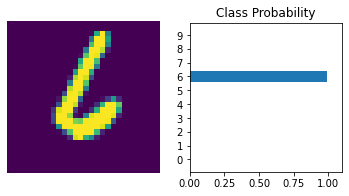

In [37]:
%matplotlib inline


images,labels = next(iter(trainloader))
img = images[63].view(1,784)

#turn off gradients to speed up this part
with torch.no_grad():
  logits = model.forward(img)

ps =F.softmax(logits,dim=1)
view_classify(img.view(1,28,28),ps)



Scratch Code
Just to demonstrate working!

In [0]:
def activation(x):
  return 1/(1+torch.exp(-x))

In [7]:
W1 = torch.randn((784,256))
B1 = torch.randn((1,256))
W2 = torch.randn((256,10))
B2 = torch.randn((1,10))
h = activation(torch.mm(features,W1)+B1)
out = activation(torch.mm(h,W2)+B2)
print(out.shape)

torch.Size([64, 10])


In [0]:
def softmax(output):
  return torch.exp(output)/torch.sum(torch.exp(output),dim=1).view(-1,1)

In [9]:
prob=softmax(out)
prob.shape

torch.Size([64, 10])